In [ ]:
def search_cover(G, i):
  radius = nx.radius(G)
  print(radius)
  center = nx.center(G)

  N = len(G)
  print(N)
  # задаем список букв
  letters = list(range(0, N))

  start_time = datetime.now()
  res = []
  tmp = {}
  for k in i:
    if tmp.get(k) == None:
      tmp[k] = 0
    tmp[k] = tmp[k]+1
  key = list(tmp.keys())
  colors = ['blue']*N
  for x in tmp:
    if tmp[x]>1:
      G_tmp = nx.bfs_tree(G, source=x, depth_limit=tmp[x]-1)
    else:
      G_tmp = x
      colors[x] = 'red'
      break
    #print(list(G_tmp.edges()))
    for node in G_tmp.nodes():

      if tmp.get(node) != None:
          colors[node] = 'red'
          G.nodes[node]['label'] = str(tmp[node])
      else:
          if colors[node] == 'blue':
            colors[node] = 'green'
  if 'blue' not in colors:
    return tmp

In [ ]:
def foo(n, k = None):
    if k is None:
        k = n

    if n == 0:
        return []

    return ([[n]] if n<=k else []) + [
        l + [i]
        for i in range(1, 1+min(n, k))
        for l in foo(n-i, i)]

In [ ]:
from itertools import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed
'''
# создаем матрицу смежности графа
adj_matrix = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
])
'''
'''
edges = input()
edges = edges.split(' ')
for i in edges:
  if i == '':
    edges.remove(i)
edge = []
for i in range(0, len(edges), 2):
  edge.append([int(edges[i])-1,int(edges[i+1])-1])
'''

#G = nx.path_graph(8)
# создаем граф из массива NumPy
#G = nx.from_edgelist(edge)
#G = nx.from_numpy_array(adj_matrix)
#G = nx.ladder_graph(8)
'''
while(True):
  G = nx.gnp_random_graph(30, 0.05)
  if(nx.is_connected(G)):
    break
'''
#G = nx.cycle_graph(16)
#G = nx.balanced_tree(3, 3)

G = nx.path_graph(18)
G.remove_edge(11,12)
G.add_edge(5,12)
G.add_edge(6,12)
radius = nx.radius(G)
print(radius)
center = nx.center(G)

N = len(G)
print(N)
# задаем список букв
letters = list(range(0, N))

start_time = datetime.now()
r = 0
res = []

comb = list(combinations_with_replacement(letters, radius+1))
print(len(comb))
for i in comb:
  tmp = {}
  for k in i:
    if tmp.get(k) == None:
      tmp[k] = 0
    tmp[k] = tmp[k]+1
  key = list(tmp.keys())
  colors = ['blue']*N
  for x in tmp:
    if tmp[x]>1:
      G_tmp = nx.bfs_tree(G, source=x, depth_limit=tmp[x]-1)
    else:
      G_tmp = x
      colors[x] = 'red'
      break
    #print(list(G_tmp.edges()))
    for node in G_tmp.nodes():
      r = r+1
      if tmp.get(node) != None:
          colors[node] = 'red'
          G.nodes[node]['label'] = str(tmp[node])
      else:
          if colors[node] == 'blue':
            colors[node] = 'green'
  if 'blue' not in colors:
    #if len(tmp)>1:
    pos = nx.spring_layout(G)
    plt.title(tmp)
    nx.draw(G, pos, node_color=colors, with_labels=True)
    plt.show()



    res.append(tmp)

print(datetime.now()-start_time)
print(res)
print(r)
'''
#comb = combinations_with_replacement(letters, radius+1)
#results = Parallel(n_jobs=-1)(delayed(search_cover)(G, i) for i in comb)
print(datetime.now()-start_time)
for tmp in results:
  if tmp != None:
    key = list(tmp.keys())
    colors = ['blue']*N
    for x in tmp:
        if tmp[x]>1:
          G_tmp = nx.bfs_tree(G, source=x, depth_limit=tmp[x]-1)
        else:
          G_tmp = x
          colors[x] = 'red'
          break
        #print(list(G_tmp.edges()))
        for node in G_tmp.nodes():

          if tmp.get(node) != None:
              colors[node] = 'red'
              G.nodes[node]['label'] = str(tmp[node])
          else:
              if colors[node] == 'blue':
                colors[node] = 'green'
    if 'blue' not in colors:

      pos = nx.spring_layout(G)
      nx.draw(G, pos, node_color=colors, with_labels=True)
      plt.show()
'''



SyntaxError: ignored

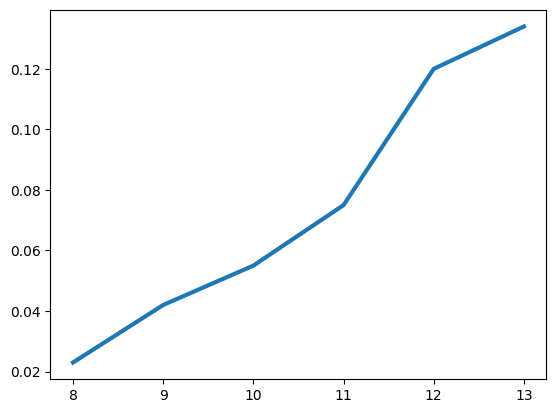

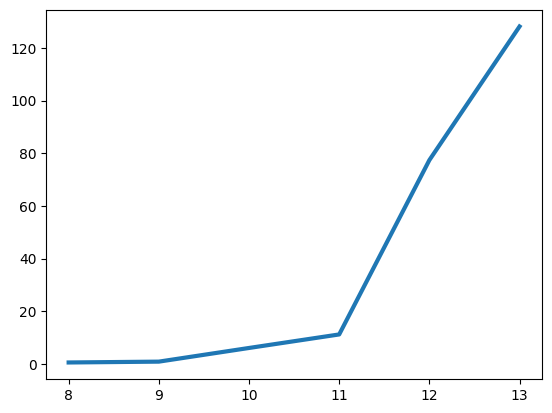

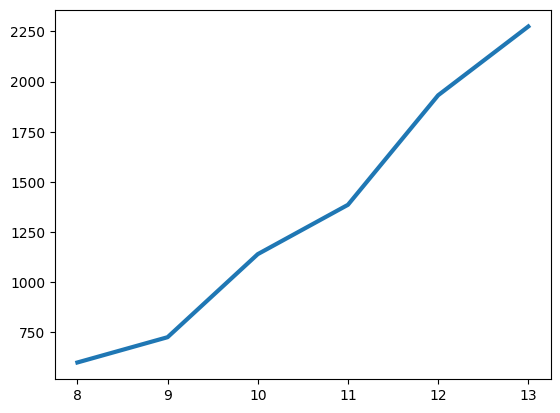

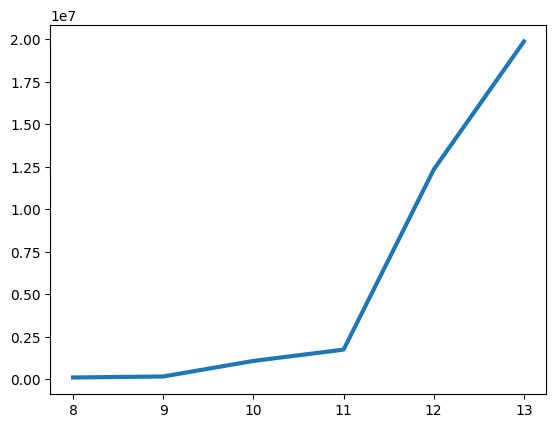

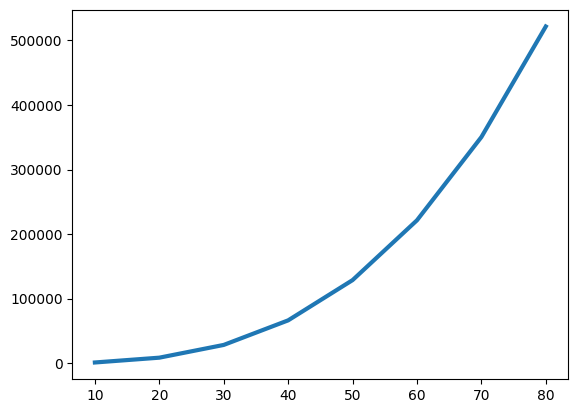

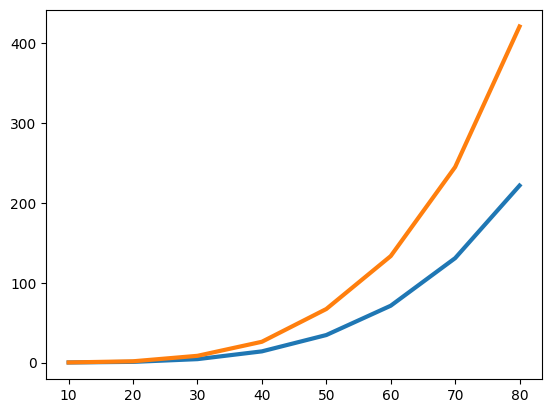

In [ ]:
num = list(range(8, 14))
n2 = [0.52, 0.84, 6.03, 11.17, 77.39, 128.15]
n3 = [0.023, 0.042, 0.055, 0.075, 0.12, 0.134]
r3 = [600, 726, 1140,1386,1932,2275]
r2 = [91904, 151479, 1066023, 1732106, 12333299, 19874156]
plt.plot(num, n3,  linewidth=3.0)
plt.show()
plt.plot(num, n2,  linewidth=3.0)
plt.show()
plt.plot(num, r3,  linewidth=3.0)
plt.show()
plt.plot(num, r2,  linewidth=3.0)
plt.show()
n10 = [10,20,30,40,50,60,70,80]
r30 = [1140, 8580, 28320, 66360, 128700, 221340,350280,521520]
n30 = [0.055, 0.83, 04.24, 13.97, 34.42, 71.14,130.72, 221.65]
p30 = [0.09, 1.55, 8.40, 26, 67.03, 133.32, 244.85, 420.9]
plt.plot(n10, r30,  linewidth=3.0)
plt.show()
plt.plot(n10, n30, n10, p30,  linewidth=3.0)
plt.show()
print()

4
16
15504
{0: 5}


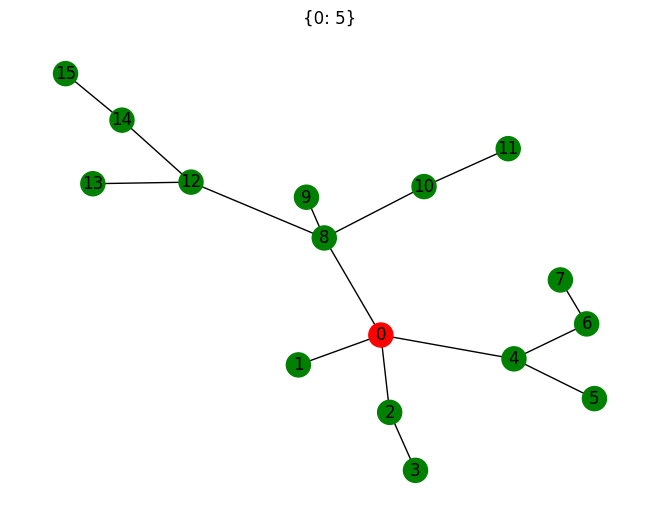

{0: 4, 15: 1}


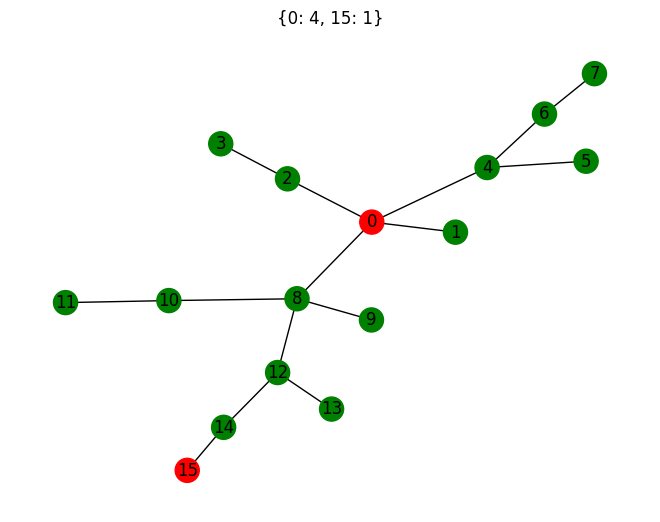

{8: 5}


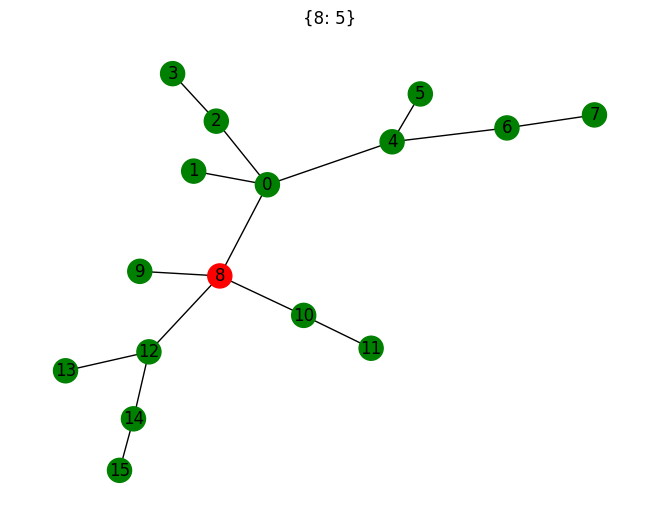

0:00:00.790848 17938


In [ ]:
from itertools import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

G = nx.binomial_tree(4)
radius = nx.radius(G)
print(radius)
center = nx.center(G)

N = len(G)
print(N)
letters = list(range(0, N))

start_time = datetime.now()
r = 0
res = []

comb = list(combinations_with_replacement(letters, radius+1))
print(len(comb))
for i in comb:
  tmp = {}
  for k in i:
    if tmp.get(k) == None:
      tmp[k] = 0
    tmp[k] = tmp[k]+1
  key = list(tmp.keys())
  colors = ['blue']*N
  for x in tmp:
    if tmp[x]>1:
      G_tmp = nx.bfs_tree(G, source=x, depth_limit=tmp[x]-1)
    else:
      G_tmp = x
      colors[x] = 'red'
      break
    for node in G_tmp.nodes():
      r = r+1
      if tmp.get(node) != None:
          colors[node] = 'red'
          G.nodes[node]['label'] = str(tmp[node])
      else:
          if colors[node] == 'blue':
            colors[node] = 'green'
  if 'blue' not in colors:

    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=colors, with_labels=True)
    plt.title(tmp)
    print(tmp)
    plt.show()
    res.append(tmp)

print(datetime.now()-start_time, r)



In [ ]:
from itertools import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

num = 10

#G = nx.ladder_graph(30)
G = nx.path_graph(160)
#G = nx.circular_ladder_graph(30)
radius = nx.radius(G)
print(radius)
center = nx.center(G)

N = len(G)
print(N)
letters = list(range(0, N))

start_time = datetime.now()
r = 0
res = []

for i in range(len(G)):
  for j in range(i, len(G)):
    if i == j:
      colors = ['blue']*N
      G_tmp = nx.bfs_tree(G, source=i, depth_limit = radius)
      colors[i] = 'red'
      for g in G_tmp:
        if colors[g] == 'blue':
          colors[g] = 'green'
      if 'blue' not in colors:
        res.append(dict([(i, radius + 1)]))
        #pos = nx.spring_layout(G)
        #nx.draw(G, pos, node_color=colors, with_labels=True)
        #plt.title(dict([(i , radius + 1)]))
        #plt.show()

    else:
      for k in range(1, radius + 1):
        colors = ['blue']*N
        r = r + 1
        if k>1:
          G_tmp1 = nx.bfs_tree(G, source=i, depth_limit=k-1)
          colors[i] = 'red'
          for g in G_tmp1:
            if colors[g] == 'blue':
              colors[g] = 'green'
        else:
          G_tmp1 = i
          colors[i] = 'red'

        if radius - k + 1 > 1:
          G_tmp2 = nx.bfs_tree(G, source=j, depth_limit = radius - k)
          colors[j] = 'red'
          for g in G_tmp2:
            if colors[g] == 'blue':
              colors[g] = 'green'
        else:
          G_tmp2 = i
          colors[j] = 'red'

        if 'blue' not in colors:
          res.append(dict([(i, k), (j, radius-k+1)]))
          #pos = nx.spring_layout(G)
          #nx.draw(G, pos, node_color=colors, with_labels=True)
          #plt.title(dict([(i, k), (j, radius-k+1)]))
          #plt.show()

print(datetime.now()-start_time, r)
print(res)

80
160
0:07:00.894751 1017600
[{0: 1, 80: 80}, {1: 2, 81: 79}, {2: 3, 82: 78}, {3: 4, 83: 77}, {4: 5, 84: 76}, {5: 6, 85: 75}, {6: 7, 86: 74}, {7: 8, 87: 73}, {8: 9, 88: 72}, {9: 10, 89: 71}, {10: 11, 90: 70}, {11: 12, 91: 69}, {12: 13, 92: 68}, {13: 14, 93: 67}, {14: 15, 94: 66}, {15: 16, 95: 65}, {16: 17, 96: 64}, {17: 18, 97: 63}, {18: 19, 98: 62}, {19: 20, 99: 61}, {20: 21, 100: 60}, {21: 22, 101: 59}, {22: 23, 102: 58}, {23: 24, 103: 57}, {24: 25, 104: 56}, {25: 26, 105: 55}, {26: 27, 106: 54}, {27: 28, 107: 53}, {28: 29, 108: 52}, {29: 30, 109: 51}, {30: 31, 110: 50}, {31: 32, 111: 49}, {32: 33, 112: 48}, {33: 34, 113: 47}, {34: 35, 114: 46}, {35: 36, 115: 45}, {36: 37, 116: 44}, {37: 38, 117: 43}, {38: 39, 118: 42}, {39: 40, 119: 41}, {40: 41, 120: 40}, {41: 42, 121: 39}, {42: 43, 122: 38}, {43: 44, 123: 37}, {44: 45, 124: 36}, {45: 46, 125: 35}, {46: 47, 126: 34}, {47: 48, 127: 33}, {48: 49, 128: 32}, {49: 50, 129: 31}, {50: 51, 130: 30}, {51: 52, 131: 29}, {52: 53, 132: 28}, {

In [ ]:
G = nx.Graph()
i =


[(3, 2), (3, 4), (2, 1), (4, 5), (1, 0), (5, 6), (6, 7), (7, 8), (8, 9)]


7
1 3 8 5 7 3 4
6
1 2
1 3
2 3
4 5
4 6
4 7


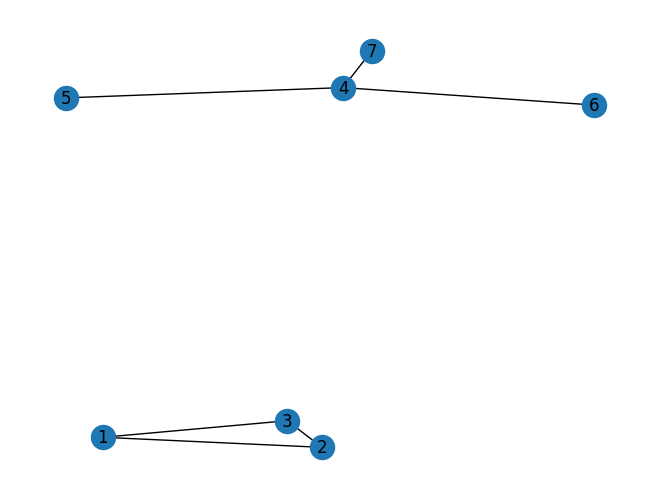

4


In [ ]:
import networkx as nx

n = int(input())#кол-во людей
G = nx.Graph()
for i in range(1, n+1):
  G.add_node(i)
e = input()# Ei
e = e.split(' ')
e_int = [int(i) for i in e]

m = int(input())#кол-во связей
for i in range(m):
  edges = input()
  edges = edges.split(' ')
  G.add_edge(*(int(edges[0]), int(edges[1])))

res = 0
for c in nx.connected_components(G):
  res_G = list(G.subgraph(c))
  min = e_int[res_G[0]-1]
  if len(res_G)>1:
    for i in range(len(res_G)):
      if min > e_int[res_G[i]-1]:
        min = e_int[res_G[i]-1]
  res = res + min

print(res)

In [ ]:
n = input()#кол-во electrichek
n = n.split('\t')

print(n)


0	1 0	2 0	3 0	4
['0', '1 0', '2 0', '3 0', '4']
